In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data_motor = pd.read_csv('/Users/larsheijnen/Thesis/data/motor/MDS-UPDRS_Part_III_21Mar2025.csv')
data_blood = pd.read_csv('/Users/larsheijnen/Thesis/data/blood/Current_Biospecimen_Analysis_Results_29Mar2025.csv')

/var/folders/kw/d3zgy6jx0gl0lybbg494yl8c0000gn/T/ipykernel_11764/1790459766.py:5: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_blood = pd.read_csv('/Users/larsheijnen/Thesis/data/blood/Current_Biospecimen_Analysis_Results_29Mar2025.csv')


# Data Filtering Documentation

## Original List
The starting list contains the following fields:
['REC_ID', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'INFODT', 'PDTRTMNT', 'PDSTATE', 'HRPOSTMED', 'HRDBSON', 'HRDBSOFF', 'PDMEDYN', 'DBSYN', 'ONOFFORDER', 'OFFEXAM', 'OFFNORSN', 'DBSOFFTM', 'ONEXAM', 'ONNORSN', 'HIFUYN', 'DBSONTM', 'PDMEDDT', 'PDMEDTM', 'EXAMDT', 'EXAMTM', 'NP3SPCH', 'NP3FACXP', 'NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'NP3RIGRL', 'NP3RIGLL', 'NP3FTAPR', 'NP3FTAPL', 'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR', 'NP3PRSPL', 'NP3TTAPR', 'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL', 'NP3RISNG', 'NP3GAIT', 'NP3FRZGT', 'NP3PSTBL', 'NP3POSTR', 'NP3BRADY', 'NP3PTRMR', 'NP3PTRML', 'NP3KTRMR', 'NP3KTRML', 'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 'NP3RTALL', 'NP3RTALJ', 'NP3RTCON', 'NP3TOT', 'DYSKPRES', 'DYSKIRAT', 'NHY', 'ORIG_ENTRY', 'LAST_UPDATE']


## Filtering Steps
The filtering process follows these steps:

1. **Keep Relevant Patient/Record Info:**
   - REC_ID
   - PATNO
   - EVENT_ID
   - PAG_NAME
   - ORIG_ENTRY
   - LAST_UPDATE

2. **Keep Examination Date/Time:**
   - EXAMDT
   - EXAMTM
   - INFODT (often the assessment date)

3. **Keep Specified Motor Score:**
   - NP3TOT

4. **Keep Treatment/Status Context (Relevant for interpreting NP3TOT):**
   - PDTRTMNT
   - PDSTATE
   - HRPOSTMED
   - HRDBSON
   - HRDBSOFF
   - PDMEDYN
   - DBSYN
   - ONOFFORDER
   - OFFEXAM
   - OFFNORSN
   - DBSOFFTM
   - ONEXAM
   - ONNORSN
   - HIFUYN
   - DBSONTM
   - PDMEDDT
   - PDMEDTM

5. **Remove Other Motor Scores:**
   - All W other NP3... items
   - DYSKPRES
   - DYSKIRAT
   - NHY

## Resulting Filtered List
The final filtered list contains:
| Field Name   | Description                                           |
|--------------|-------------------------------------------------------|
| REC_ID       | Record Identifier                                     |
| PATNO        | Participant Identifier (Relevant patient info)        |
| EVENT_ID     | Visit Identifier                                      |
| PAG_NAME     | Page Name (Metadata)                                  |
| INFODT       | Assessment Date (Often the primary date)             |
| PDTRTMNT     | On treatment status (Context)                         |
| PDSTATE      | ON/OFF state (Context)                               |
| HRPOSTMED    | Hours post medication (Context)                       |
| HRDBSON      | Hours DBS On (Context)                                |
| HRDBSOFF     | Hours DBS Off (Context)                               |
| PDMEDYN      | On PD Medication? (Context)                          |
| DBSYN        | Has DBS? (Context)                                   |
| ONOFFORDER   | Order of ON/OFF exam (Context)                        |
| OFFEXAM      | OFF Exam Performed? (Context)                        |
| OFFNORSN     | Reason OFF Exam Not Performed (Context)               |
| DBSOFFTM     | Time DBS Turned Off (Context)                         |
| ONEXAM       | ON Exam Performed? (Context)                         |
| ONNORSN      | Reason ON Exam Not Performed (Context)                |
| HIFUYN       | Had HIFU? (Context)                                  |
| DBSONTM      | Time DBS Turned On (Context)                          |
| PDMEDDT      | Date of Last PD Med Dose (Context)                    |
| PDMEDTM      | Time of Last PD Med Dose (Context)                    |
| EXAMDT       | Examination Date (Specifically requested)            |
| EXAMTM       | Examination Time (Specifically requested)            |
| NP3TOT       | MDS-UPDRS Part III Total Score (Specifically requested to keep) |
| ORIG_ENTRY   | Original Entry Date (Metadata)                        |
| LAST_UPDATE  | Last Update Date (Metadata)                           |

In [3]:
columns_to_keep = [
    'REC_ID',        # Record Identifier
    'PATNO',         # Participant Identifier (Relevant patient info)
    'EVENT_ID',      # Visit Identifier
    'PAG_NAME',      # Page Name (Metadata)
    'INFODT',        # Assessment Date (Often the primary date)
    'PDTRTMNT',      # On treatment status (Context)
    'PDSTATE',       # ON/OFF state (Context)
    'HRPOSTMED',     # Hours post medication (Context)
    'HRDBSON',       # Hours DBS On (Context)
    'HRDBSOFF',      # Hours DBS Off (Context)
    'PDMEDYN',       # On PD Medication? (Context)
    'DBSYN',         # Has DBS? (Context)
    'ONOFFORDER',    # Order of ON/OFF exam (Context)
    'OFFEXAM',       # OFF Exam Performed? (Context)
    'OFFNORSN',      # Reason OFF Exam Not Performed (Context)
    'DBSOFFTM',      # Time DBS Turned Off (Context)
    'ONEXAM',        # ON Exam Performed? (Context)
    'ONNORSN',       # Reason ON Exam Not Performed (Context)
    'HIFUYN',        # Had HIFU? (Context)
    'DBSONTM',       # Time DBS Turned On (Context)
    'PDMEDDT',       # Date of Last PD Med Dose (Context)
    'PDMEDTM',       # Time of Last PD Med Dose (Context)
    'EXAMDT',        # Examination Date (Specifically requested)
    'EXAMTM',        # Examination Time (Specifically requested)
    'NP3TOT',        # MDS-UPDRS Part III Total Score (Specifically requested to keep)
    'ORIG_ENTRY',    # Original Entry Date (Metadata)
    'LAST_UPDATE'    # Last Update Date (Metadata)
]

In [4]:
filtered_data = data_motor[columns_to_keep].copy()
# filtered_data.to_csv('/Users/larsheijnen/Thesis/data/MDS-UPDRS_Patient_Data.csv', index=False)

In [4]:
print("\nFiltered DataFrame head:")
filtered_data.head()


Filtered DataFrame head:


,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,PDTRTMNT,PDSTATE,HRPOSTMED,HRDBSON,HRDBSOFF,...,ONNORSN,HIFUYN,DBSONTM,PDMEDDT,PDMEDTM,EXAMDT,EXAMTM,NP3TOT,ORIG_ENTRY,LAST_UPDATE
0,272451901,3000,BL,NUPDRS3,02/2011,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,02/2011,13:17:00,4.0,02/2011,2020-06-25 16:02:19.0
1,338703101,3000,V04,NUPDRS3,03/2012,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,03/2012,13:47:00,1.0,03/2012,2020-06-25 16:02:22.0
2,385009801,3000,V06,NUPDRS3,02/2013,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,02/2013,12:22:00,4.0,02/2013,2020-06-25 16:02:22.0
3,437131401,3000,V08,NUPDRS3,03/2014,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,03/2014,13:22:00,2.0,05/2014,2020-06-25 16:02:22.0
4,512469901,3000,V10,NUPDRS3,03/2015,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,03/2015,11:43:00,19.0,03/2015,2020-06-25 16:02:23.0


In [ ]:
filtered_data.head(300).to_csv('/Users/larsheijnen/Thesis/data/MDS-UPDRS_First_300_Rows.csv', index=False)
data_blood.head(300).to_csv('/Users/larsheijnen/Thesis/data/Blood_data_First_300_Rows.csv')

In [5]:
#To check the different types, testvalues

data_blood_filtered = data_blood[data_blood['PATNO'] == 4035]
# data_blood_filtered.head()
print(data_blood_filtered['TYPE'].unique())
# print(data_blood_filtered['TESTVALUE'].unique())

['DNA' 'Serum' 'miRNA' 'Cerebrospinal Fluid' 'Whole Blood' 'Plasma'
 'Urine']


#### Features to Keep in Cerebrospinal Fluid
Based on current evidence, prioritize the following CSF biomarkers:
##### α-Synuclein Metrics
- **a-Synuclein**: Reduced levels are associated with PD and progression.
- **RT-QuIC/SAA metrics (if available)**: Include variables like Time to Threshold, T50, and Area Under the Curve.
##### Tau and Amyloid Pathways
- **pTau**: Phosphorylated tau is linked to rapid motor progression.
- **ABeta 1-42**: Decreased levels predict cognitive decline.
##### Neuroaxonal Damage
- **NFL (Neurofilament Light)**: Elevated levels correlate with axonal degeneration and disease severity.
##### Mitochondrial Dysfunction
- **MTDNA_DELETION**: Reflects mitochondrial damage, a key mechanism in PD.
##### Inflammatory Markers
- **IL-6**: Tracks neuroinflammation, which may accelerate progression.
- **sTREM2 and YKL40**: Indicators of microglial activation and inflammation.
##### Glial Activation
- **GFAP (Glial Fibrillary Acidic Protein)**: Associated with astrocytic activation in PD.
- **S100**: Linked to glial activity and neurodegeneration.

https://www.perplexity.ai/search/dna-serum-mirna-cerebrospinal-4va8HG.iTeiizn9xFrtcrw

In [6]:
csf_data = data_blood[data_blood['TYPE'] == 'Cerebrospinal Fluid']
# print("Testnames in blood data:")
# print(csf_data['TESTNAME'].unique())

# csf_data.to_csv('/Users/larsheijnen/Thesis/data/blood/CSF_blood_data.csv', index=False)

useful_data = csf_data[csf_data['TESTNAME'].str.contains('Alpha-synuclein|pTau|ABeta 1-42|NFL|MTDNA_DELETION|IL-6|sTREM2|YKL40|GFAP|S100', case=False, na=False)]
csf_data.to_csv('/Users/larsheijnen/Thesis/data/blood/CSF_useful_features_blood_data.csv', index=False)

# print('\n')
print("Useful testnames in blood data:")
print(useful_data['TESTNAME'].unique())

Useful testnames in blood data:
['CSF Alpha-synuclein' 'ABeta 1-42' 'pTau' 'MTDNA_DELETION' 'GFAP' 'IL-6'
 'S100' 'NFL' 'sTREM2' 'YKL40']


## Checking PATNOS in motor data, and blood data

In [11]:
NP3TOT_motor_data = data_motor.dropna(subset=['NP3TOT'])
NP3TOT_motor_data_unique_patnos_count = NP3TOT_motor_data['PATNO'].nunique()

unique_pd_patients = useful_data[useful_data['COHORT'] == 'PD']['PATNO'].nunique()
unique_non_pd_patients = useful_data[useful_data['COHORT'] != 'PD']['PATNO'].nunique()

# Find the intersection of PATNOs in data_motor and useful_data
common_patnos_motor_useful = set(data_motor['PATNO']).intersection(set(useful_data['PATNO']))
print(f"Number of unique PD patients in filtered/useful blood data: {unique_pd_patients}")
print(f"Number of unique non-PD patients in filtered/useful blood data: {unique_non_pd_patients}")
print(f"Number of unique patients in filtered/useful blood data: {unique_pd_patients + unique_non_pd_patients}")
print(f"Number of unique PATNOs in NP3TOT_motor_data: {NP3TOT_motor_data_unique_patnos_count}")
print("\n")

# Print the number of common PATNOs
print(f"Number of common PATNOs in data_motor and useful_data: {len(common_patnos_motor_useful)}")

# # Print the row of PATNO 16580 in data_motor
# print("Data from data_motor:")
# print(data_motor[data_motor['PATNO'] == 16580])

# # Print the row of PATNO 16580 in useful_data
# print("\nData from useful_data:")
# print(useful_data[useful_data['PATNO'] == 16580])


Number of unique PD patients in filtered/useful blood data: 639
Number of unique non-PD patients in filtered/useful blood data: 710
Number of unique patients in filtered/useful blood data: 1349
Number of unique PATNOs in NP3TOT_motor_data: 4298


Number of common PATNOs in data_motor and useful_data: 1348


/var/folders/kw/d3zgy6jx0gl0lybbg494yl8c0000gn/T/ipykernel_10538/2309344231.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  patno_16580_data['INFODT'] = pd.to_datetime(patno_16580_data['INFODT'], errors='coerce')
/var/folders/kw/d3zgy6jx0gl0lybbg494yl8c0000gn/T/ipykernel_10538/2309344231.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patno_16580_data['INFODT'] = pd.to_datetime(patno_16580_data['INFODT'], errors='coerce')


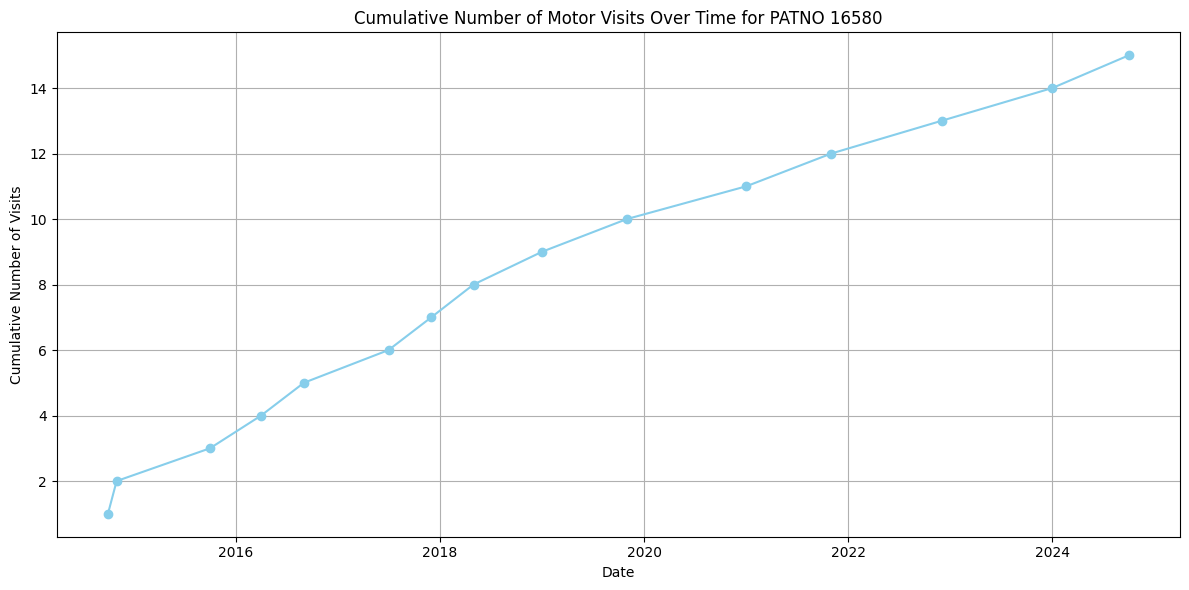

In [39]:
# Filter data_motor for PATNO 16580
patno_16580_data = data_motor[data_motor['PATNO'] == 16580]

# Convert the INFODT column to datetime for proper time-based analysis
patno_16580_data['INFODT'] = pd.to_datetime(patno_16580_data['INFODT'], errors='coerce')

# Count cumulative number of visits over time
patno_16580_data = patno_16580_data.sort_values('INFODT')
patno_16580_data['Cumulative_Visits'] = range(1, len(patno_16580_data) + 1)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(patno_16580_data['INFODT'], patno_16580_data['Cumulative_Visits'], marker='o', color='skyblue')
plt.title('Cumulative Number of Motor Visits Over Time for PATNO 16580')
plt.xlabel('Date')
plt.ylabel('Cumulative Number of Visits')
plt.grid(True)
plt.tight_layout()
plt.show()